# **Library**

In [ ]:
# Instalasi library yang dibutuhkan
!pip install google-play-scraper   # Untuk mengambil data ulasan dari Google Play Store
!pip install emoji                 # Untuk mengolah dan mengenali emoji dalam teks
!pip install Sastrawi              # Untuk stemming (mengubah kata ke bentuk dasar) dalam Bahasa Indonesia
!pip install transformers          # Untuk menggunakan model NLP (Natural Language Processing) dari HuggingFace
!pip install scikit-learn          # Untuk berbagai metode machine learning, termasuk preprocessing dan evaluasi model
!pip install imbalanced-learn      # Untuk menangani dataset yang tidak seimbang (imbalanced dataset)

# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')     # Mount drive agar bisa mengakses file yang ada di Google Drive

# Import library untuk scraping dan manipulasi data
from google_play_scraper import Sort, reviews_all, reviews  # Mengambil semua ulasan aplikasi dari Google Play
import csv                      # Untuk membaca dan menulis file CSV
import pandas as pd             # Untuk membaca file CSV dan manipulasi data dalam bentuk DataFrame
import re                       # Untuk melakukan operasi pencocokan pola (regex)
import string                   # Untuk operasi terkait karakter dan string
import emoji                    # Untuk mendeteksi dan memproses emoji dalam teks

# Import library untuk NLP (Natural Language Processing)
import nltk
from nltk.tokenize import word_tokenize      # Untuk memecah kalimat menjadi kata-kata
from nltk.corpus import stopwords            # Untuk menghapus kata-kata umum (stopwords) yang tidak penting
nltk.download("punkt_tab")                   # Untuk tokenisasi kalimat dan kata
nltk.download("stopwords")                   # Untuk mengunduh daftar stopwords

# Import library dan konfigurasi stemming Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()  # Membuat objek stemmer untuk mengubah kata menjadi bentuk dasar

# Untuk membaca data dari URL atau string yang seolah-olah dari file
import requests
from io import StringIO

# Import transformer untuk analisis sentimen atau tugas NLP
from transformers import pipeline                                           # Pipeline standar untuk analisis teks, seperti sentimen
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Untuk memuat tokenizer dan model klasifikasi teks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00
Mounted at /content/drive


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Screping Dataset Playstore**

> Scraping dataset Playstore adalah proses **pengambilan data aplikasi** dari Google Play Store secara otomatis menggunakan library ***google_play_scrape***. Proses ini dilakukan untuk mengumpulkan informasi seperti nama aplikasi, rating, jumlah unduhan, kategori, hingga ulasan pengguna, yang nantinya bisa digunakan untuk analisis atau pembuatan model machine learning.

In [ ]:
# Mengambil data ulasan aplikasi dari Google Play Store menggunakan package 'google_play_scraper'
review_data = reviews(
    'com.byu.id',             # ID aplikasi yang ingin diambil ulasannya
    lang='id',                # Bahasa ulasan yang diambil
    country='id',             # Negara asal ulasan
    sort=Sort.MOST_RELEVANT,  # Mengurutkan ulasan berdasarkan yang paling relevan
    count=120000              # Jumlah maksimum ulasan yang ingin diambil
)

## **LOADING DATASET**


> Loading dataset adalah proses memuat atau membaca data yang sudah tersedia ke dalam program atau lingkungan kerja agar dapat dianalisis atau diproses lebih lanjut.



In [ ]:
# Membuat DataFrame dari data review aplikasi
app_reviews = pd.DataFrame(review_data[0])

# Mengambil jumlah baris (jumlah review) dan jumlah kolom dalam DataFrame
number_of_reviews, number_of_columns = app_reviews.shape

print("Reviews:", number_of_reviews)  # Menampilkan jumlah review
print("column:", number_of_columns)   # Menampilkan jumlah kolom (fitur) yang ada di setiap review

Reviews: 120000
column: 11


In [ ]:
# Menampilkan 3 baris pertama dari DataFrame app_reviews
app_reviews.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,98a124df-3df7-4c26-940c-032ffcd2e484,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sering bermasalah, data dihidupkan...",3,8,1.61.0,2025-04-09 02:30:00,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-09 02:57:32,1.61.0
1,c2e27eee-027e-48be-9d67-d24f2ffc26ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,assalamu'alaikum ulasan saya sangat sangat san...,1,6,1.61.0,2025-04-11 02:26:35,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-11 15:18:26,1.61.0
2,44b6bf8c-bb88-4f29-9bd3-98d649c1f0ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,iklan pop up kuota yang di tampilkan sih bagus...,3,1,1.61.0,2025-04-10 00:29:54,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-10 03:36:28,1.61.0


In [ ]:
# Menampilkan informasi ringkas tentang DataFrame app_reviews
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              120000 non-null  object        
 1   userName              120000 non-null  object        
 2   userImage             120000 non-null  object        
 3   content               119999 non-null  object        
 4   score                 120000 non-null  int64         
 5   thumbsUpCount         120000 non-null  int64         
 6   reviewCreatedVersion  101679 non-null  object        
 7   at                    120000 non-null  datetime64[ns]
 8   replyContent          110917 non-null  object        
 9   repliedAt             110917 non-null  datetime64[ns]
 10  appVersion            101679 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.1+ MB


## **CLEAN DATASET**

> Clean dataset adalah data yang telah melalui proses pembersihan untuk menghilangkan nilai kosong, dan duplikat, sehingga siap digunakan untuk analisis sentimen



In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews
clean_df = app_reviews.dropna(subset=['content'])

# menghapus duplikat dari dataframe clean_df
data_clean = clean_df.drop_duplicates()

removing_duplicate, column_removing_duplicate = data_clean.shape

print("Reviews after removing duplicates:", removing_duplicate)
print("column after removing dublictes:", column_removing_duplicate)

Reviews after removing duplicates: 119999
column after removing dublictes: 11


In [ ]:
# Menampilkan informasi ringkas tentang DataFrame data_clean
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119999 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              119999 non-null  object        
 1   userName              119999 non-null  object        
 2   userImage             119999 non-null  object        
 3   content               119999 non-null  object        
 4   score                 119999 non-null  int64         
 5   thumbsUpCount         119999 non-null  int64         
 6   reviewCreatedVersion  101678 non-null  object        
 7   at                    119999 non-null  datetime64[ns]
 8   replyContent          110916 non-null  object        
 9   repliedAt             110916 non-null  datetime64[ns]
 10  appVersion            101678 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 11.0+ MB


In [ ]:
# menyimpan hasil screping ke google drive
data_clean.to_csv('/content/drive/MyDrive/Project/sentiment_analysis/screping_app_review.csv', index=False)

# **Preprocessing Dataset**


> pada tahap preprocessing data yang sebelumnya berhasil di-load akan dibersih terlebih dahalu, dengan tujuan menyiapkannya agar siap untuk dianalisis atau digunakan dalam pelatihan model



In [ ]:
def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Menghapus karakter non-ASCII
    text = re.sub(r"@\w+", "", text)  # Hapus mention (@username)
    text = re.sub(r"#(\w+)", r"\1", text)  # Hapus "#" tapi simpan kata setelahnya
    text = re.sub(r"http\S+|www\S+", "", text)  # Hapus URL
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text) # hapus seluruh karakter kecuali huruf dan angka
    text = text.strip()  # Hapus spasi berlebih
    text = emoji.replace_emoji(text, replace="")  # Hapus emoji
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca
    return text

# mengubah teks menjadi huruf kecil
def casefold_text(text):
    return text.lower()

# mepecah teks menjadi kata-kata
def tokenize_text(text):
    return word_tokenize(text)

# Filtering (hapus stopwords)
def filter_text(tokens):
    stop_words = set(stopwords.words("indonesian"))
    custom_stopwords = ['iya','yaa','gak','nya','na', 'yg', 'ane', 'bla', 'sih', 'ku', "di", "ga", "ya", "gaa", "loh", "kah", "woi", "woii", "woy", "pas"]
    stop_words.update(custom_stopwords)
    return [word for word in tokens if word not in stop_words]

# Mengubah kata-kata ke bentuk dasar (stemming)
def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

# Mengubah daftar kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# menghapus kumpulan slang words atau kata-kata informal yang sering digunakan dalam percakapan sehari-hari
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split() # Memisahkan teks menjadi list kata berdasarkan spasi
    fixed_words = []     # Menyimpan kata-kata hasil perbaikan

    # Iterasi setiap kata dalam list
    for word in words:
        if word.lower() in slangwords: # Jika kata (dalam huruf kecil) ada dalam kamus slangwords, ganti dengan versi formal
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word) # Jika tidak, biarkan kata tetap sama

    fixed_text = ' '.join(fixed_words) # Gabungkan kembali kata-kata menjadi kalimat
    return fixed_text

In [ ]:
# Membaca data review dari file CSV ke dalam DataFrame
data_clean = pd.read_csv('/content/drive/MyDrive/Project/sentiment_analysis/screping_app_review.csv')

data_clean['clean_text'] = data_clean['content'].apply(clean_text)                  # Membersihkan teks (misalnya menghapus karakter khusus, emoji, dll.)
data_clean['casefolded_text'] = data_clean['clean_text'].apply(casefold_text)       # Melakukan case folding (mengubah semua huruf menjadi huruf kecil)
data_clean['slangwords_text'] = data_clean['casefolded_text'].apply(fix_slangwords) # Mengganti kata-kata gaul/slang menjadi bentuk baku
data_clean['tokenized_text'] = data_clean['slangwords_text'].apply(tokenize_text)   # Melakukan tokenisasi (memisahkan kalimat menjadi kata-kata)
data_clean['filtered_text'] = data_clean['tokenized_text'].apply(filter_text)       # Menghapus stopwords atau kata-kata yang tidak penting
data_clean['final_text'] = data_clean['filtered_text'].apply(toSentence)            # Menggabungkan kembali token menjadi kalimat setelah diproses
# data_clean['stemmed_text'] = data_clean['filtered_text'].apply(stem_text)

In [ ]:
# Mengganti nilai NaN pada kolom 'filtered_text' dengan string kosong (" ")
# Serta menampilkan 5 baris pertama dari kolom 'filtered_text' setelah diisi dengan string kosong
data_clean['filtered_text'].fillna(" ").head()

,filtered_text
0,"[aplikasinya, bermasalah, data, dihidupkan, ka..."
1,"[byu, stabil, lag, main, game, online, aneh, b..."
2,"[kecewa, berat, pengalaman, membeli, paket, ku..."
3,"[assalamualaikum, ulasan, nyaman, enak, promo,..."
4,"[sinyal, susah, daerah, majalengka, kecamatan,..."


In [ ]:
# Menampilkan 3 baris pertama dari DataFrame data_clean
data_clean.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,clean_text,casefolded_text,slangwords_text,tokenized_text,filtered_text,final_text
0,98a124df-3df7-4c26-940c-032ffcd2e484,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sering bermasalah, data dihidupkan...",3,8,1.61.0,2025-04-09 02:30:00,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-09 02:57:32,1.61.0,Aplikasinya sering bermasalah data dihidupkan ...,aplikasinya sering bermasalah data dihidupkan ...,aplikasinya sering bermasalah data dihidupkan ...,"[aplikasinya, sering, bermasalah, data, dihidu...","[aplikasinya, bermasalah, data, dihidupkan, ka...",aplikasinya bermasalah data dihidupkan kadang ...
1,4fa741b7-03fe-4fe8-b246-3e83e2d750b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dulu By.U cukup stabil, tapi sekarang sering l...",1,73,1.61.0,2025-03-29 23:24:47,"Hai kak Yin, Sebelumnya mohon maaf banget, ata...",2025-03-30 02:46:55,1.61.0,Dulu ByU cukup stabil tapi sekarang sering lag...,dulu byu cukup stabil tapi sekarang sering lag...,dulu byu cukup stabil tapi sekarang sering lag...,"[dulu, byu, cukup, stabil, tapi, sekarang, ser...","[byu, stabil, lag, main, game, online, aneh, b...",byu stabil lag main game online aneh banget di...
2,1afe8f1c-7b6c-463f-95d2-f5868d60355e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa berat dengan pengalaman saya membeli pa...,1,157,1.61.0,2025-03-22 05:35:48,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-22 15:14:22,1.61.0,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,"[kecewa, berat, dengan, pengalaman, saya, memb...","[kecewa, berat, pengalaman, membeli, paket, ku...",kecewa berat pengalaman membeli paket kuota su...


In [ ]:
# menyimpan data hasil procesing ke drive
data_clean.to_csv('/content/drive/MyDrive/Project/sentiment_analysis/proccesing_data.csv', index=False)

# **Labeling Dataset**


> Proses memberi label pada data teks (ulasan aplikasi) untuk mengategorikan sentimen yang terkandung di dalamnya, seperti positif, negatif, atau netral.



## **indobert 2 class**

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Memuat model dan tokenizer yang telah dilatih untuk 2 kelas
pretrained = "indobenchmark/indobert-base-p1"
model = AutoModelForSequenceClassification.from_pretrained(pretrained, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Membuat pipeline analisis sentimen
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Menentukan pemetaan label untuk 2 kelas
label_index = {0: 'negative', 1: 'positive'}

# Fungsi untuk melakukan analisis sentimen dan mencetak hasil
def analyze_sentiment(text):
    result = sentiment_analysis(text)
    label_id = int(result[0]['label'].split('_')[-1])  # Mendapatkan ID label
    status = label_index[label_id]
    score = result[0]['score']
    print(f'Text: {text} | Label: {status} ({score * 100:.3f}%)')

In [ ]:
df_label = pd.read_csv('/content/drive/MyDrive/Project/sentiment_analysis/proccesing_data.csv')

# Apply sentiment analysis to your DataFrame
df_label['sentiment'] = df_label['final_text'].astype(str).apply(lambda x: label_index[int(sentiment_analysis(x)[0]['label'].split('_')[-1])])
df_label['sentiment_score'] = df_label['final_text'].astype(str).apply(lambda x: sentiment_analysis(x)[0]['score'])

In [ ]:
df_label.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,clean_text,casefolded_text,slangwords_text,tokenized_text,filtered_text,final_text,sentiment,sentiment_score
0,1b33539b-5f17-431f-8843-bce7cb5fa2e0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"UX nya ngga banget. Pas daftar kendaraan, masa...",1,26,4.6.7,2025-03-04 09:22:26,"Hai, Sobat Dede. Mohon maaf atas ketidaknyaman...",2025-03-05 02:13:27,4.6.7,UX nya ngga banget Pas daftar kendaraan masa p...,ux nya ngga banget pas daftar kendaraan masa p...,ux nya tidak banget pas daftar kendaraan masa ...,"['ux', 'nya', 'tidak', 'banget', 'pas', 'dafta...","['ux', 'banget', 'pas', 'daftar', 'kendaraan',...",ux banget pas daftar kendaraan pas sengaja kep...,positive,0.761959
1,12740561-48e3-476c-a0a0-854ddd11b459,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah terdaftar dengan plat nomor lama tp kemu...,1,3,4.6.7,2025-03-06 16:04:28,"Hai, Sobat. Mohon maaf atas ketidaknyamanan ya...",2025-03-07 06:28:51,4.6.7,Sudah terdaftar dengan plat nomor lama tp kemu...,sudah terdaftar dengan plat nomor lama tp kemu...,sudah terdaftar dengan plat nomor lama tapi ke...,"['sudah', 'terdaftar', 'dengan', 'plat', 'nomo...","['terdaftar', 'plat', 'nomor', 'ganti', 'plat'...",terdaftar plat nomor ganti plat nomor plat ber...,positive,0.668748
2,c66b5320-29ca-4415-a654-17a424e3b176,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin lama makin busuk min aplikasi nya, mau d...",1,107,4.6.6,2025-02-19 02:27:49,"Hai, Sobat Yogi. Mohon maaf atas ketidaknyaman...",2025-02-19 07:33:08,4.6.6,Makin lama makin busuk min aplikasi nya mau da...,makin lama makin busuk min aplikasi nya mau da...,makin lama makin busuk min aplikasi nya mau da...,"['makin', 'lama', 'makin', 'busuk', 'min', 'ap...","['busuk', 'min', 'aplikasi', 'daftar', 'unit',...",busuk min aplikasi daftar unit kamera akses al...,positive,0.658577
3,aecb542b-6b19-48e6-a4fc-25bc460af144,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mau coba bayar aplikasi, tpi hubungkan metode ...",1,7,4.6.6,2025-03-01 07:11:41,"Hai, Sobat Hans. Mohon maaf atas ketidaknyaman...",2025-03-01 08:43:27,4.6.6,Mau coba bayar aplikasi tpi hubungkan metode p...,mau coba bayar aplikasi tpi hubungkan metode p...,mau coba bayar aplikasi tapi hubungkan metode ...,"['mau', 'coba', 'bayar', 'aplikasi', 'tapi', '...","['coba', 'bayar', 'aplikasi', 'hubungkan', 'me...",coba bayar aplikasi hubungkan metode pembayara...,positive,0.652392
4,8eb604e7-6b35-4c77-9a01-7da325e46204,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi yang sangat buruk,isi data berlapis, ...",1,93,4.6.6,2025-02-10 23:53:44,"Hai, Sobat. Mimin sampaikan, mengambil foto ST...",2025-02-11 11:02:12,4.6.6,Aplikasi yang sangat burukisi data berlapis ha...,aplikasi yang sangat burukisi data berlapis ha...,aplikasi yang sangat burukisi data berlapis ha...,"['aplikasi', 'yang', 'sangat', 'burukisi', 'da...","['aplikasi', 'burukisi', 'data', 'berlapis', '...",aplikasi burukisi data berlapis habis isi isia...,positive,0.668691


In [ ]:
sentiment_counts = df_label['sentiment'].value_counts()
sentiment_percentage = df_label['sentiment'].value_counts(normalize=True) * 100

for sentiment in sentiment_counts.index:
    count = sentiment_counts[sentiment]
    percentage = sentiment_percentage[sentiment]
    print(f"{sentiment}: {count} ({percentage:.2f}%)")

positive: 29260 (97.53%)
negative: 740 (2.47%)


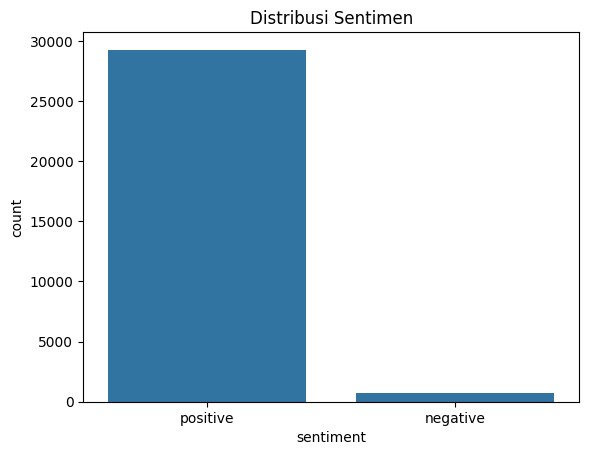

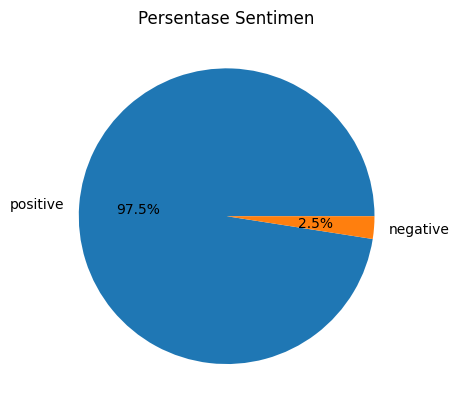

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
sns.countplot(x='sentiment', data=df_label)
plt.title('Distribusi Sentimen')
plt.show()

# Calculate sentiment counts
sentiment_counts = df_label['sentiment'].value_counts()

# Pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Persentase Sentimen')
plt.show()

In [ ]:
df_label.to_csv('/content/drive/MyDrive/Project/sentiment_analysis/data_labeled_2class.csv', index=False)

## **indobert 3 class**

In [ ]:
# Memuat model dan tokenizer yang telah dilatih sebelumnya
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Membuat alur analisis sentimen
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Menentukan pemetaan label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Fungsi untuk melakukan analisis sentimen dan mencetak hasil
def analyze_sentiment(text):
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    score = result[0]['score']
    print(f'Text: {text} | Label : {status} ({score * 100:.3f}%)')

Device set to use cuda:0


In [ ]:
# Membaca file CSV yang berisi data teks yang telah diproses sebelumnya
df_label = pd.read_csv('/content/drive/MyDrive/Project/sentiment_analysis/proccesing_data.csv')

# Menambahkan kolom 'sentiment' berdasarkan hasil analisis sentimen
df_label['sentiment'] = df_label['final_text'].astype(str).apply(lambda x: label_index[sentiment_analysis(x)[0]['label']])
# Menambahkan kolom 'sentiment_score' yang menyimpan skor sentimen
df_label['sentiment_score'] = df_label['final_text'].astype(str).apply(lambda x: sentiment_analysis(x)[0]['score'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Menampilkan 3 baris pertama dari DataFrame df_label
df_label.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,clean_text,casefolded_text,slangwords_text,tokenized_text,filtered_text,final_text,sentiment,sentiment_score
0,98a124df-3df7-4c26-940c-032ffcd2e484,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sering bermasalah, data dihidupkan...",3,8,1.61.0,2025-04-09 02:30:00,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-09 02:57:32,1.61.0,Aplikasinya sering bermasalah data dihidupkan ...,aplikasinya sering bermasalah data dihidupkan ...,aplikasinya sering bermasalah data dihidupkan ...,"['aplikasinya', 'sering', 'bermasalah', 'data'...","['aplikasinya', 'bermasalah', 'data', 'dihidup...",aplikasinya bermasalah data dihidupkan kadang ...,negative,0.969033
1,4fa741b7-03fe-4fe8-b246-3e83e2d750b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dulu By.U cukup stabil, tapi sekarang sering l...",1,73,1.61.0,2025-03-29 23:24:47,"Hai kak Yin, Sebelumnya mohon maaf banget, ata...",2025-03-30 02:46:55,1.61.0,Dulu ByU cukup stabil tapi sekarang sering lag...,dulu byu cukup stabil tapi sekarang sering lag...,dulu byu cukup stabil tapi sekarang sering lag...,"['dulu', 'byu', 'cukup', 'stabil', 'tapi', 'se...","['byu', 'stabil', 'lag', 'main', 'game', 'onli...",byu stabil lag main game online aneh banget di...,negative,0.983923
2,1afe8f1c-7b6c-463f-95d2-f5868d60355e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa berat dengan pengalaman saya membeli pa...,1,157,1.61.0,2025-03-22 05:35:48,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-22 15:14:22,1.61.0,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,"['kecewa', 'berat', 'dengan', 'pengalaman', 's...","['kecewa', 'berat', 'pengalaman', 'membeli', '...",kecewa berat pengalaman membeli paket kuota su...,negative,0.996505


In [ ]:
# Menghitung jumlah kemunculan setiap kelas sentimen
sentiment_counts = df_label['sentiment'].value_counts()

# Menghitung persentase kemunculan setiap kelas sentimen
sentiment_percentage = df_label['sentiment'].value_counts(normalize=True) * 100

# Menampilkan hasil jumlah dan persentase untuk setiap sentimen
for sentiment in sentiment_counts.index:
    count = sentiment_counts[sentiment]                # Jumlah kemunculan untuk sentimen
    percentage = sentiment_percentage[sentiment]       # Persentase kemunculan untuk sentimen
    print(f"{sentiment}: {count} ({percentage:.2f}%)")

negative: 56218 (46.85%)
positive: 45775 (38.15%)
neutral: 18006 (15.01%)


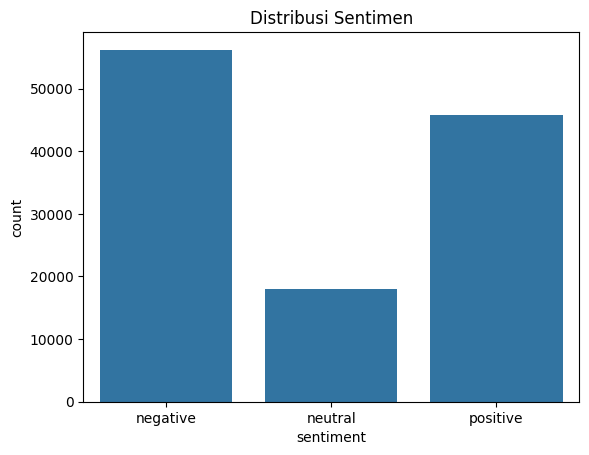

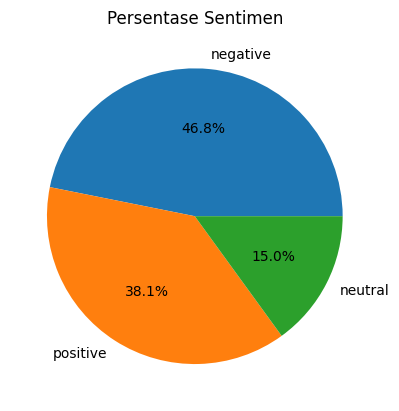

In [ ]:
import matplotlib.pyplot as plt  # Untuk membuat plot
import seaborn as sns  # Untuk visualisasi yang lebih estetis

# Membuat bar plot untuk menunjukkan distribusi sentimen
sns.countplot(x='sentiment', data=df_label)   # Membuat grafik batang berdasarkan kolom 'sentiment' di df_label
plt.title('Distribusi Sentimen')              # Menambahkan judul pada grafik
plt.show()                                    # Menampilkan grafik

# Menghitung jumlah kemunculan masing-masing sentimen
sentiment_counts = df_label['sentiment'].value_counts() # Menghitung jumlah setiap kategori sentimen dalam df_label

# Membuat pie chart untuk menunjukkan persentase distribusi sentimen
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')   # Membuat pie chart dengan label dan persentase
plt.title('Persentase Sentimen')                                              # Menambahkan judul pada pie chart
plt.show()                                                                    # Menampilkan pie chart


In [ ]:
# menyimpan data hasil labeling ke drive
df_label.to_csv('/content/drive/MyDrive/Project/sentiment_analysis/data_labeled.csv', index=False)

# **Downsampling**


> Downsampling merupakan teknik dalam pemrosesan data, terutama dalam imbalanced dataset (dataset yang memiliki distribusi label yang tidak merata), dimana dengan mengurangi jumlah sampel dari kelas yang lebih banyak agar dataset lebih seimbang. Tujuan utama dari downsampling adalah untuk menghindari model yang bias terhadap kelas mayoritas.



In [ ]:
from sklearn.utils import resample

# Membaca data yang sudah dilabeli dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Project/sentiment_analysis/data_labeled.csv')

# Memisahkan data berdasarkan kelas sentimen (positive, negative, neutral)
positive_class = data[data['sentiment'] == 'positive']
negative_class = data[data['sentiment'] == 'negative']
neutral_class = data[data['sentiment'] == 'neutral']

# Menentukan ukuran kelas terkecil untuk melakukan downsampling
min_class_size = min(len(positive_class), len(negative_class), len(neutral_class))

# Melakukan downsampling untuk masing-masing kelas agar ukuran kelas seimbang
downsampled_positive = resample(positive_class,
                                 replace=False,             # Tidak menggandakan sampel
                                 n_samples=min_class_size,  # Mengambil jumlah sampel yang sama dengan kelas terkecil
                                 random_state=42)           # Menetapkan seed untuk hasil yang konsisten

downsampled_negative = resample(negative_class,
                                 replace=False,
                                 n_samples=min_class_size,
                                 random_state=42)

downsampled_neutral = resample(neutral_class,
                                replace=False,
                                n_samples=min_class_size,
                                random_state=42)

# Menggabungkan data yang sudah di-downsampling dari masing-masing kelas
downsampled_data = pd.concat([downsampled_positive, downsampled_negative, downsampled_neutral])

# Menampilkan jumlah sampel dari masing-masing kelas dalam data yang sudah di-downsampling
print(downsampled_data['sentiment'].value_counts())


sentiment
positive    18006
negative    18006
neutral     18006
Name: count, dtype: int64


# **Data Splitting**

> Data splitting adalah proses membagi dataset menjadi beberapa bagian untuk keperluan pelatihan (training) dan pengujian (testing) model machine learning. Tujuan utamanya adalah untuk mengukur performa model secara objektif menggunakan data yang belum pernah dilihat oleh model sebelumnya.



In [ ]:
from sklearn.model_selection import train_test_split

# data_csv = pd.read_csv('/content/drive/MyDrive/Project/sentiment_analysis/data_labeled.csv') # digunakan saat tidak di downsampling
data_spliting = downsampled_data  # data_csv

# memisahkan data menjadi 2: data latih dan data uji
X = data_spliting['final_text']   # Fitur (teks ulasan)
y = data_spliting['sentiment']    # Target (sentimen)

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# X_train dan y_train berisi data latih
# X_test dan y_test berisi data uji

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# melihat distribusi kelas pada data latih dan uji
print("\nDistribusi kelas pada data latih:")
print(y_train.value_counts())
print("\nDistribusi kelas pada data uji:")
print(y_test.value_counts())

# Menyimpan data latih dan data uji ke dalam DataFrame
train_data = pd.DataFrame({'final_text': X_train, 'sentiment': y_train})
test_data = pd.DataFrame({'final_text': X_test, 'sentiment': y_test})

Jumlah data latih: 43214
Jumlah data uji: 10804

Distribusi kelas pada data latih:
sentiment
neutral     14405
negative    14405
positive    14404
Name: count, dtype: int64

Distribusi kelas pada data uji:
sentiment
positive    3602
negative    3601
neutral     3601
Name: count, dtype: int64


In [ ]:
# manampilkan sebagian hasil dari train data
train_data.head()

,final_text,sentiment
111585,good,positive
61930,pengiriman harga paket ok cuman h,positive
63610,no sim sdh dgunakn slm mngpa msi trftar diakun...,neutral
117753,nyoba,positive
25606,kartu minggu aktif lancar skrng kartunya kebac...,neutral


In [ ]:
# manampilkan sebagian hasil dari test data
test_data.head()

,final_text,sentiment
3141,menurun byu sinyal down isi paket susah buka a...,negative
79502,aplikasinya bagus,positive
78272,pin pengambilan sim card indomaret muncul muncul,neutral
67728,bang beli pulsa bri soalx aplikasi bank bri,neutral
72092,jagan tampilkan isi paket,neutral


# **Modeling**

> Dalam konteks sentiment analysis, modeling berfungsi sebagai proses membangun dan melatih model machine learning untuk mempelajari pola dari data ulasan (review) yang sudah diberi label sentimen (positif, negatif, netral), lalu digunakan untuk memprediksi sentimen dari ulasan baru.





## **Naive Bayes**

>Naive Bayes adalah algoritma klasifikasi berbasis probabilistik yang digunakan dalam proyek ini untuk menganalisis sentimen ulasan aplikasi. Dengan menggabungkan metode TF-IDF vectorizer dan Multinomial Naive Bayes, model dapat mengklasifikasikan teks ke dalam kategori sentimen seperti positif, negatif, atau netral dengan efisien dan akurat.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# menambah fitur dan label untuk data latih dan uji
X_train, y_train = train_data['final_text'], train_data['sentiment']
X_test, y_test = test_data['final_text'], test_data['sentiment']

# Mengisi nilai NaN dengan string kosong
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Feature Extraction dengan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training Model Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Prediksi pada data latih dan uji
y_pred_train = clf.predict(X_train_vec)
y_pred_test = clf.predict(X_test_vec)

# Evaluasi Model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Menampilkan hasil evaluasi
print(f"\nAkurasi Model (Train): {accuracy_train:.4f}")
print(f"Akurasi Model (Test): {accuracy_test:.4f}")

# Menampilkan classification report untuk evaluasi lebih mendalam
print('\nClassification Report:')
print(classification_report(y_test, y_pred_test))



Akurasi Model (Train): 0.8663
Akurasi Model (Test): 0.8029

 Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.84      0.78      3601
     neutral       0.79      0.79      0.79      3601
    positive       0.91      0.78      0.84      3602

    accuracy                           0.80     10804
   macro avg       0.81      0.80      0.80     10804
weighted avg       0.81      0.80      0.80     10804



## **Random Forest**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# menambah fitur dan label untuk data latih dan uji
X_train, y_train = train_data['final_text'], train_data['sentiment']
X_test, y_test = test_data['final_text'], test_data['sentiment']

# Mengisi nilai NaN dengan string kosong
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Feature Extraction dengan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training Model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vec, y_train)

# Prediksi pada data latih dan uji
y_pred_train = clf.predict(X_train_vec)
y_pred_test = clf.predict(X_test_vec)

# Evaluasi Model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Menampilkan hasil evaluasi
print(f"\nAkurasi Model (Train): {accuracy_train:.4f}")
print(f"Akurasi Model (Test): {accuracy_test:.4f}")

# Menampilkan classification report untuk evaluasi lebih mendalam
print('\nClassification Report:')
print(classification_report(y_test, y_pred_test))



Akurasi Model (Train): 0.9993
Akurasi Model (Test): 0.8251

 Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.79      0.81      3601
     neutral       0.77      0.84      0.80      3601
    positive       0.89      0.85      0.87      3602

    accuracy                           0.83     10804
   macro avg       0.83      0.83      0.83     10804
weighted avg       0.83      0.83      0.83     10804



# **Fungsi Inference**


> Inference adalah proses di mana model yang sudah dilatih digunakan untuk memprediksi sentimen dari data teks baru. Proses ini sangat penting saat model diimplementasikan dalam aplikasi nyata untuk mengklasifikasikan ulasan pengguna secara otomatis.



In [ ]:
def predict_sentiment(text):
    # mengambil fungsi dari Preprocessing
    text = clean_text(text)
    text = casefold_text(text)
    text = fix_slangwords(text)
    tokens = tokenize_text(text)
    filtered_tokens = filter_text(tokens)
    final_text = toSentence(filtered_tokens)

    # Ekstrak Fitur dan Prediksi
    text_vec = vectorizer.transform([final_text]) # Extraction dengan TF-IDF
    sentiment = clf.predict(text_vec)[0]          # Prediksi dengan Model yang disimpan di variabel clf pada train model
    return sentiment

# Input teks
text_input = input("Input Teks Predict: ")
sentiment = predict_sentiment(text_input)   # Memprediksi sentimen berdasarkan input teks
print(f"\nTeks: '{text_input}'")            # Menampilkan teks input
print(f"Sentimen: {sentiment}")             # Menampilkan hasil prediksi sentimen

Input Teks Predict: aplikasinya bagus banget!!

Teks: 'aplikasinya bagus banget!!'
Sentimen: positive
